# Welcome to my Human Resource Notebook
Make use of the Notebook.
Human resources, or HR, is a department in a company that manages its employees and ensures their well-being.

The Objective of this notebook is to give an idea of the workflow in any predictive modeling problem. How do we check features, how do we add new features and some Machine Learning Concepts? I have tried to keep the notebook as basic as possible so that even newbies can understand every phase.

Contents of the Notebook:
Sector1: Exploratory Data Analysis(EDA):
1)Analysis of the features.

2)Basic Analysis 

3)Finding any relations or trends considering multiple features.

Part2: Feature Engineering and Data Cleaning:
1)Adding any few features.

2)Making the IQR method.

3)Converting features into a suitable form for modeling.

Part3: Predictive Modeling
1)Running Basic Algorithms.

2)Cross Validation.

3)Ensembling.

4)Important Features Extraction.

# Import Libaries 

**Load the Data set**

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Import the libraries for making charts and cleaning and more productive process

In [139]:
df=pd.read_csv("StudentsPerformance.csv")

Call the dataset CSV here I am using the student performance data set

**View the details**

In [142]:
df.head(23)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [143]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [144]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There are five objects and three integer columns

In [147]:
df['race/ethnicity'].value_counts().sort_index()

race/ethnicity
group A     89
group B    190
group C    319
group D    262
group E    140
Name: count, dtype: int64

Now we are viewing the number of groups in ascending ordere

In [149]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [150]:
num=df.select_dtypes(include="number").columns
cat=df.select_dtypes(exclude="number").columns
print(cat)
print(num)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')
Index(['math score', 'reading score', 'writing score'], dtype='object')


Here we see a seperate categorical columns and numerical columns

**Missing values**

In [153]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

We do not have any null values

In [155]:
df['math score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

In [156]:
df['gender'].describe()

count       1000
unique         2
top       female
freq         518
Name: gender, dtype: object

In [157]:
df['gender'].value_counts

<bound method IndexOpsMixin.value_counts of 0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object>

In [158]:
df['gender'].value_counts(normalize=True)*100

gender
female    51.8
male      48.2
Name: proportion, dtype: float64

In this above cell, we can see that I am calling the gender columns and seeing the value counts in float type

**Without normalize parameter**

In [161]:
a=df['gender'].value_counts()
print(a)

gender
female    518
male      482
Name: count, dtype: int64


**With normalize parameter**

In [163]:
b=df['gender'].value_counts(normalize=True)
print(b)

gender
female    0.518
male      0.482
Name: proportion, dtype: float64


In [164]:
correlation = df['math score'].corr(df['writing score'])
print("Correlation between Maths score and Writing score:", correlation)

Correlation between Maths score and Writing score: 0.8026420459498078


In [165]:
correlation = df['reading score'].corr(df['writing score'])
print("Correlation between Maths score and Writing score:", correlation)

Correlation between Maths score and Writing score: 0.9545980771462476


In this topic, we are seeing the correlation between numerical columns

In [237]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Types Of Features
Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can bcategorizeded by the m.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the datasrace/ethnicity  parental level of education, lunch, test preparation course.ked.

Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Mand edium, Short, then Heianht is a ordinal variable. Here we can have a relative sort in the variable.

Ordinal FeatureDatasete race/ethnicityt:Continuous
Continous Feature:
A feature iscontinuousbe continous if it can take values between any two points or between the minimum or maximum values in the featurContinuous.

Continous FeDatasetinreading score, math score, writing score.e dataset: Aget: Age

**Missing value treatment** 

In [241]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**Using IQR method**
What is IQR metthod=The interquartile range (IQR) method is a statistical method that can be used to identify outliers in data. It's a straightforward approach that can be applied to a variety of data types, including genomics, proteomics, imaging data, and clinical data.

In [244]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [246]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [248]:
q1=df[num].quantile(0.25)
q3=df[num].quantile(0.75)
print(q1)
print(q3)

math score       57.00
reading score    59.00
writing score    57.75
Name: 0.25, dtype: float64
math score       77.0
reading score    79.0
writing score    79.0
Name: 0.75, dtype: float64


In [250]:
iqr = q3-q1
iqr

math score       20.00
reading score    20.00
writing score    21.25
dtype: float64

In [252]:
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(upper)
print(lower)

math score       107.000
reading score    109.000
writing score    110.875
dtype: float64
math score       27.000
reading score    29.000
writing score    25.875
dtype: float64


In [254]:
outliers=df[((df[num]<lower)|(df[num]>upper))]
print(outliers)

    gender race/ethnicity parental level of education lunch  \
0      NaN            NaN                         NaN   NaN   
1      NaN            NaN                         NaN   NaN   
2      NaN            NaN                         NaN   NaN   
3      NaN            NaN                         NaN   NaN   
4      NaN            NaN                         NaN   NaN   
..     ...            ...                         ...   ...   
995    NaN            NaN                         NaN   NaN   
996    NaN            NaN                         NaN   NaN   
997    NaN            NaN                         NaN   NaN   
998    NaN            NaN                         NaN   NaN   
999    NaN            NaN                         NaN   NaN   

    test preparation course  math score  reading score  writing score  
0                       NaN         NaN            NaN            NaN  
1                       NaN         NaN            NaN            NaN  
2                       NaN

In [256]:
nooutliers=df[~((df[num]<lower)|(df[num]>upper))]
print(nooutliers)

    gender race/ethnicity parental level of education lunch  \
0      NaN            NaN                         NaN   NaN   
1      NaN            NaN                         NaN   NaN   
2      NaN            NaN                         NaN   NaN   
3      NaN            NaN                         NaN   NaN   
4      NaN            NaN                         NaN   NaN   
..     ...            ...                         ...   ...   
995    NaN            NaN                         NaN   NaN   
996    NaN            NaN                         NaN   NaN   
997    NaN            NaN                         NaN   NaN   
998    NaN            NaN                         NaN   NaN   
999    NaN            NaN                         NaN   NaN   

    test preparation course  math score  reading score  writing score  
0                       NaN        72.0           72.0           74.0  
1                       NaN        69.0           90.0           88.0  
2                       NaN

In the above two cells, we can see that we filtered out the numerical columns into a separate par as outliers and no outliers apart

In [259]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [261]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


**Visualization**
Visualization (graphics), is the physical or imagining creation of images, diagrams, or animations to communicate a message. Data and information visualization is the practice of creating visual representations of complex data and information.

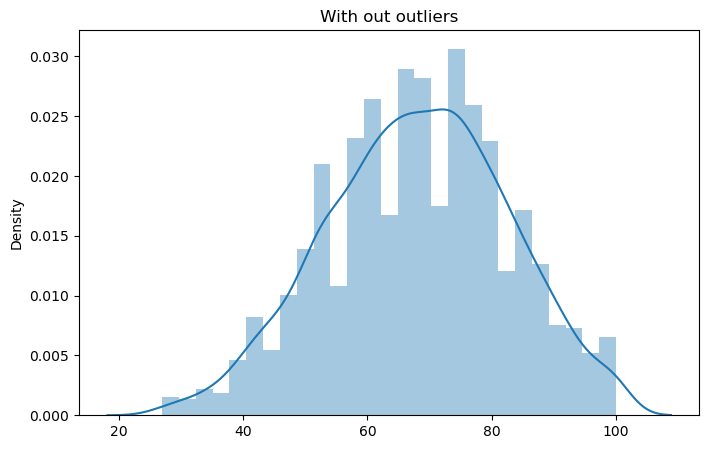

In [264]:
plt.figure(figsize=(8,5))
sns.distplot(nooutliers[num])
plt.title("With out outliers")
plt.show()

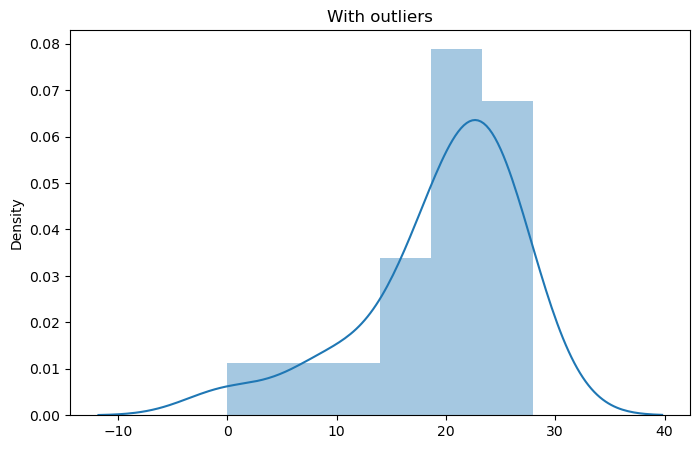

In [265]:
plt.figure(figsize=(8,5))
sns.distplot(outliers[num])
plt.title("With outliers")
plt.show()

**Visualization**
* Uni-Variate 

In [269]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


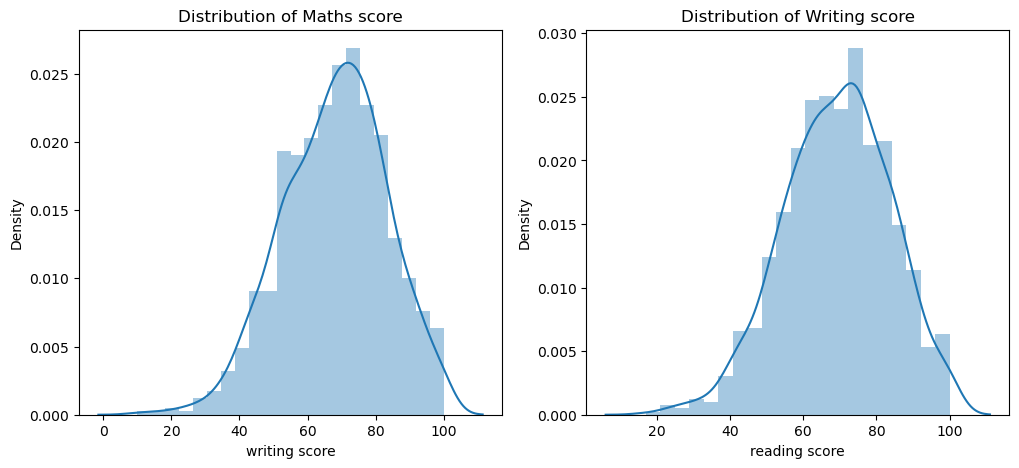

In [271]:
f,ax=plt.subplots(1,2,figsize = (12,5))
sns.distplot(df['writing score'],ax=ax[0])
sns.distplot(df['reading score'],ax=ax[1])
ax[0].set_title("Distribution of Maths score")
ax[1].set_title("Distribution of Writing score")
plt.show()

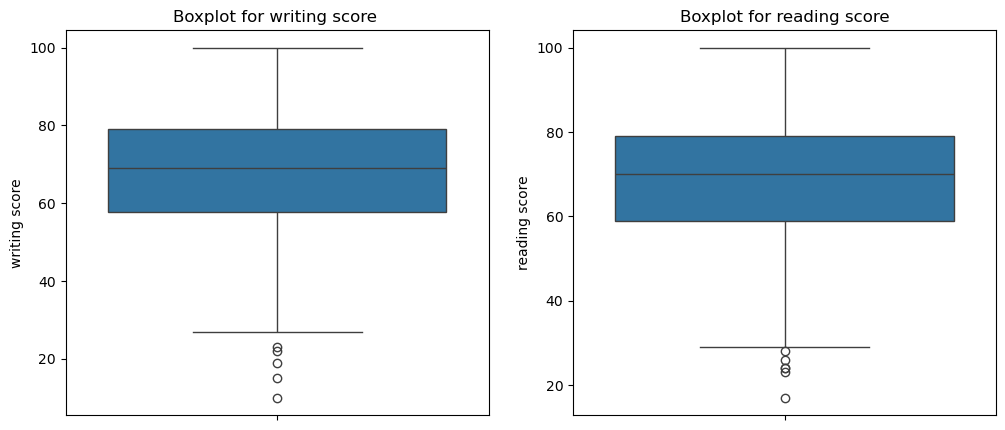

In [272]:
f,ax=plt.subplots(1,2,figsize = (12,5))
sns.boxplot(df['writing score'],ax=ax[0])
sns.boxplot(df['reading score'],ax=ax[1])
ax[0].set_title("Boxplot for writing score ")
ax[1].set_title("Boxplot for reading score")
plt.show()

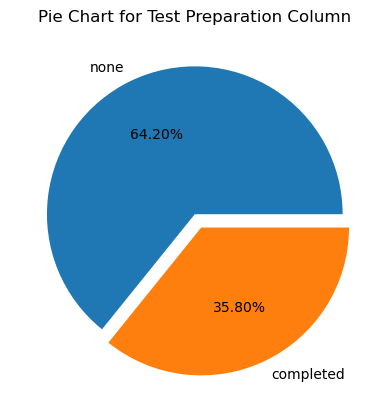

In [275]:
plt.pie(df['test preparation course'].value_counts(),autopct="%.2f%%", labels= df['test preparation course'].value_counts().index, explode=[0, 0.1])
plt.title("Pie Chart for Test Preparation Column")
plt.show()

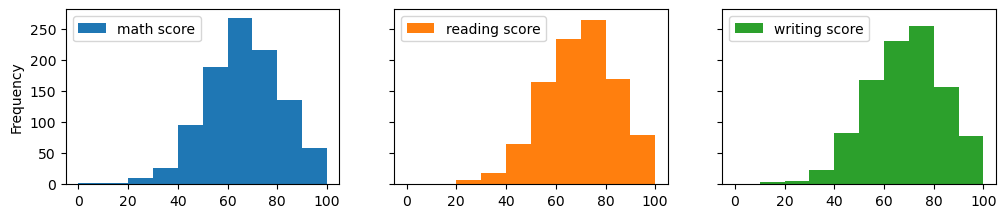

In [277]:
df.plot.hist(subplots= True,layout=(2,3),figsize=(12,5),sharex= True,sharey=True)
plt.show()

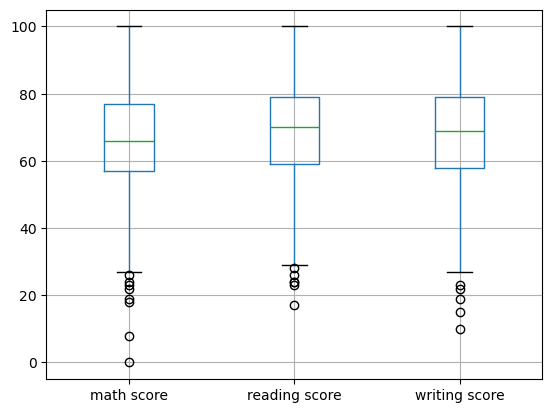

In [279]:
df.boxplot()
plt.show()

**Bi-variate**